# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Sainan Chen
- Liying Gui
- Yuechen Liu
- Kunal Parilekar
- Maryam Rahdaran
- Mingshuo Yu

# Group Members IDs

- A14483750
- A14428755
- A15682187
- A12747850
- A15714113
- A

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [31]:
#Import the libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [32]:
#Set up the dataframe
main_df = pd.read_csv("master.csv")
#Set up the supplementary dataframe for HDI
supp_df = pd.read_csv("Human-development-index-HDI.csv", encoding='latin-1')

In [33]:
#Now combine the two databases
#Get the earliest year from the main database
min_year = main_df['year'].min()
print(min_year)
#This falls before the supp database so leave it for now
supp_df


1985


,Human development index (HDI),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
5,70,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777,0.770,0.766,0.762,0.765,0.768,0.770,0.775,0.778,0.780
6,47,Argentina,0.704,0.713,0.720,0.725,0.728,0.731,0.738,0.746,...,0.795,0.799,0.813,0.819,0.818,0.820,0.820,0.822,0.822,0.825
7,83,Armenia,0.631,0.628,0.580,0.588,0.599,0.605,0.612,0.623,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
8,3,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,...,0.920,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
9,20,Austria,0.795,0.800,0.805,0.807,0.813,0.817,0.820,0.824,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [34]:
supp_df['Country'] = supp_df['Country'].astype(str)
supp_df.dtypes

Human development index (HDI)      int64
Country                           object
1990                             float64
1991                             float64
1992                             float64
1993                             float64
1994                             float64
1995                             float64
1996                             float64
1997                             float64
1998                             float64
1999                             float64
2000                             float64
2001                             float64
2002                             float64
2003                             float64
2004                             float64
2005                             float64
2006                             float64
2007                             float64
2008                             float64
2009                             float64
2010                             float64
2011                             float64
2012            

In [35]:
main_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [36]:
#Set a comparator
comparator = np.float64(10)
#Now iterate through the main and find relevant values
for i, row in main_df.iterrows():
    #Only do this if there isn't already a value for HDI
    if(pd.isna(row['HDI for year'])):
        value = -1
        country = row['country']
        year = row['year']
        year = str(year)
        #Get the relevant row from the supp dataframe
        hdi_row = supp_df.loc[supp_df['Country'].str.contains(country)]
        #Check if the year is in the columns
        if(year in hdi_row.columns):
            #If so, get the value
            value = hdi_row[year]
        #If the value was found and it wasn't -1, and the series is not empty get the first value of the series
        if(type(value) != type(-1)):
            if(len(value) > 0):
                value = (value.values[0])
                if(pd.isna(value)):
                    value = -1
            else:
                value = -1
        main_df.loc[i, 'HDI for year'] = value

# Data Cleaning

Describe your data cleaning steps here.

In [37]:
#First get an understanding of what the data looks like
main_df.shape

(27820, 12)

In [38]:
checked_df = main_df.dropna()
checked_df.shape

(27820, 12)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [39]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

1. Is suicide rate growing every year? 

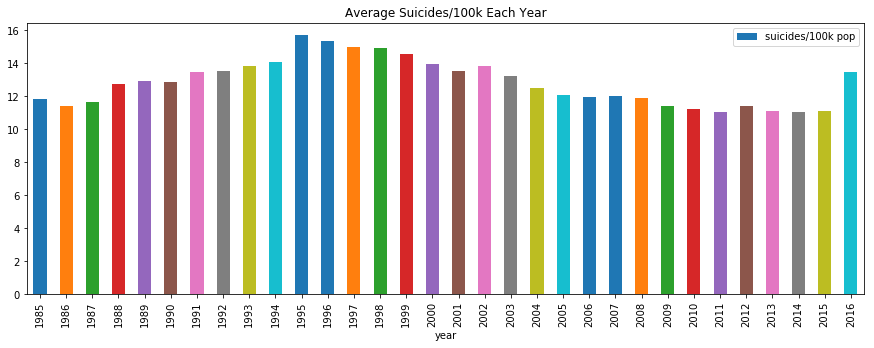

In [40]:
year_group = main_df.groupby('year').mean()
year_group.plot(y='suicides/100k pop',kind="bar", figsize=(15, 5), title="Average Suicides/100k Each Year")

As we can see in the graph, we cannot conclude that the suicide rate is growing each year. We can see from the graph that there is a peak in 1995 and 2016 but there is no clear clue to show that the suicide rate is either increasing or decreasing.

2. In general, which population is more likely to commit suicide? (country, age, gender) 

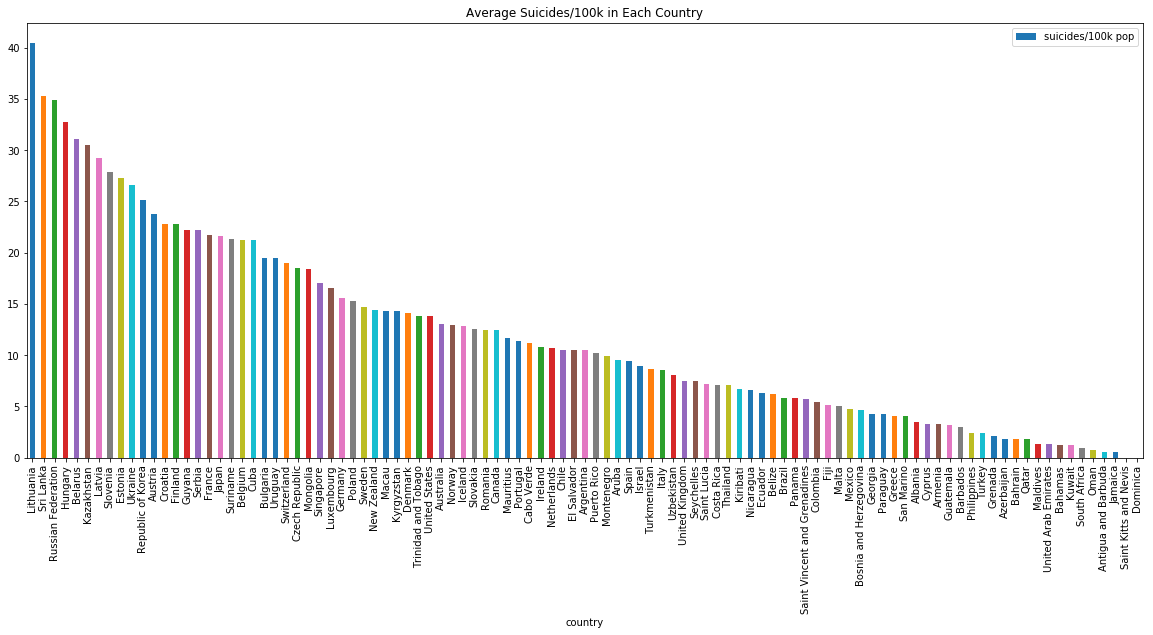

In [41]:
country_group = main_df.groupby('country').mean()
country_group = country_group.sort_values(by=['suicides/100k pop'], ascending=False)
country_group.plot(y='suicides/100k pop',kind="bar", figsize=(20, 8), title="Average Suicides/100k in Each Country")

In [42]:
country_group

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Lithuania,2005.419847,107.019084,2.598672e+05,40.415573,0.794176,9280.549618
Sri Lanka,1997.545455,421.522727,1.382770e+06,35.295152,0.523091,904.272727
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,0.681074,6518.814815
Hungary,2003.419355,238.358065,8.020782e+05,32.761516,0.717284,9370.051613
Belarus,2001.095238,237.666667,7.832234e+05,31.075913,0.313952,3333.904762
Kazakhstan,2002.500000,325.467949,1.209980e+06,30.511282,0.657077,5329.115385
Latvia,2005.000000,50.674603,1.779867e+05,29.259325,0.773381,8961.095238
Slovenia,2005.000000,42.123016,1.597961e+05,27.827857,0.849143,18642.238095
Estonia,2005.000000,27.912698,1.075032e+05,27.276905,0.811048,11376.095238


Above table is countries that are sorted in the order of suicide rate. As we can see the countries listed in the top have higher suicide rate.

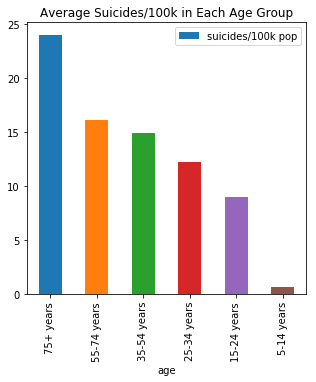

In [43]:
age_group = main_df.groupby('age').mean()
age_group = age_group.sort_values(by=['suicides/100k pop'], ascending=False)
age_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each Age Group")

As we can see in the graph above, age group of 75+ has the highest suicide rate and age group of 5-1

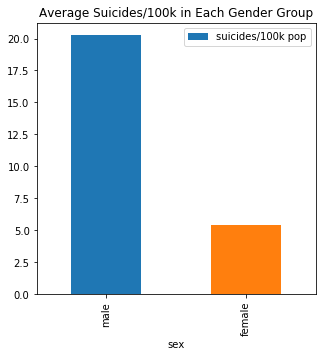

In [44]:
gender_group = main_df.groupby('sex').mean()
gender_group = gender_group.sort_values(by=['suicides/100k pop'], ascending=False)
gender_group.plot(y='suicides/100k pop',kind="bar", figsize=(5, 5), title="Average Suicides/100k in Each Gender Group")

As we can see in the graph above, males' suicide rate is significantly higher than females'.

# Ethics & Privacy

- Based on the Kaggle policy we complied that we use the Services for our own internal, personal, non-commercial use, and not on behalf of or for the benefit of any third party therefore we have the permission to use the data. Since what we are doing is a non-profit school project that is not for the benefit of any third party, we believe that we have permission to use the data. (https://www.kaggle.com/terms)
- We believe that we do not need to deal with the privacy concerns since the data is masked. Similar to data that is protected by the Safe Harbour method, we cannot see any identifiers of the individuals that are in this dataset.
- There is potential bias in our dataset, that is, the dataset is not complete. It is missing some countries (including China and India, which are the two countries with most population in the world) therefore a large number of population is excluded in this dataset.
- Another issue is that we do not know how the data was collected, therefore we are not sure if the data is completely accurate. It is possible that in some countries the suiciders were not found or some people’s cause of death was misidentified.
- Unfortunately we cannot tell if the data is collected exactly accurate or not. However, since the dataset is analyzing the relationship among age, gender and country GDP, we can analyze the data even though the data does not include every country in the world since we are doing the hypothesis test of relationship .


# Conclusion & Discussion

*Fill in your discussion information here*